# Exercício 1

**Nome:** Angela Crepaldi
<!--Escreva os comandos abaixo para conseguir habilitar negrito e matrizes do LaTeX-->
$\newcommand{\bX}{\mathbf{X}}$
$\newcommand{\bw}{\mathbf{w}}$
$\newcommand{\by}{\mathbf{y}}$
$\newcommand{\bx}{\mathbf{x}}$
$\newcommand{\bA}{\mathbf{A}}$
$\newcommand{\bB}{\mathbf{B}}$
$\newcommand{\mat}[1]{\begin{bmatrix} #1 \end{bmatrix}}$
$\newcommand{\matt}[1]{\begin{matrix} #1 \end{matrix}}$
<!--
The following ipython magic (this is literally the name) will enable plots made by matplotlib to be rendered inside this notebook.
%matplotlib inline
-->

In [1]:
# Bibliotecas

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Manipulando arrays

1. Escreva uma função do Python que implementa a [similaridade do cosseno](https://en.wikipedia.org/wiki/Cosine_similarity) (eq. A.7 do Watt) entre dois vetores, definida por

$$
{\rm cosine\_similarity(\bx,\by)} = \frac{\bx^T \by}{\|\bx\|\|\by\|}
$$

In [2]:
# Solução

def cosine_similarity(x,y):
    s = (np.transpose(x) @ y) / (np.linalg.norm(x) * np.linalg.norm(y))
    return s

# Testes
x = np.array([1,2,3,4])
y = np.array([2,2,2,2])
z = np.array([2,-2,2,-2])
print(cosine_similarity(x,y)) # = 0.9128709291752769
print(cosine_similarity(x,z)) # = -0.18257418583505536

0.9128709291752769
-0.18257418583505536


2. Calcule os produtos $\bA^T\bB$ e $\bB \bA^T$, onde
$$\bA = \mat{1 & 2 \\ 3 & 4 \\ 5 & 6} \qquad \bB = \mat{1 & 1 \\ 1 & 1 \\ 1 & 1}$$

In [3]:
A = np.array([[1, 2], [3, 4], [5, 6]])
A

array([[1, 2],
       [3, 4],
       [5, 6]])

In [4]:
B = np.ones((3, 2))
B

array([[1., 1.],
       [1., 1.],
       [1., 1.]])

In [5]:
A.T @ B

array([[ 9.,  9.],
       [12., 12.]])

In [6]:
B.T @ A

array([[ 9., 12.],
       [ 9., 12.]])

3. Considere os vetores abaixo.

In [7]:
A = np.array([[1,0,1],[0,1,0],[1,1,1]])
A

array([[1, 0, 1],
       [0, 1, 0],
       [1, 1, 1]])

In [8]:
b = np.array([1,2,3])
b

array([1, 2, 3])

Explique o porquê do resultado abaixo.

In [9]:
np.all(b*A == A*b)

True

Resposta:

A função np.all() testa se todos os elementos da matriz são verdadeiros, neste caso, a matriz é o resultado da comparação entre $b*A$ e $A*b$ cujos elementos correspondentes são iguais. 

A operação $*$ no python faz uma multiplicação elemento a elemento. Para ser uma multiplicação entre arrays, é necessário utilizar o produto interno, np.dot(A, b), ou o operador @.

In [10]:
b*A

array([[1, 0, 3],
       [0, 2, 0],
       [1, 2, 3]])

In [11]:
A*b

array([[1, 0, 3],
       [0, 2, 0],
       [1, 2, 3]])

In [12]:
np.dot(A, b)

array([4, 2, 6])

In [13]:
np.dot(b, A)

array([4, 5, 4])

In [14]:
A @ b

array([4, 2, 6])

In [15]:
b @ A

array([4, 5, 4])

# 2. Manipulando dados

1. Baixe o arquivo `bitcoin_price.csv` (**terceiro** arquivo da lista em *Data Sources*) disponível em

https://www.kaggle.com/sudalairajkumar/cryptocurrencypricehistory/

e salve-o numa subpasta `data`, i.e., o arquivo estará acessível em `data/bitcoin_price.csv`

2. Carregue o arquivo usando a biblioteca Pandas
3. Trace o gráfico do preço de fechamento ("Close") em função da data para todo o ano de 2017 (365 amostras):
 - usando a função `.plot()` do Pandas
 - convertendo para NumPy e usando Matplotlib

### Dicas

- Siga o notebook fornecido de exemplo do Pandas e/ou qualquer outro tutorial de Pandas (https://pandas.pydata.org/pandas-docs/stable/10min.html)

In [16]:
import os
# ex1_path = caminho de Ex1_Solution
ex1_path = os.getcwd()

In [17]:
# Carregando os dados usando Pandas
btc_tbl = pd.read_csv(ex1_path + '/data/bitcoin_price.csv')
btc_tbl.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Feb 20, 2018",11231.8,11958.5,11231.80,11403.7,"9,926,540,000","189,536,000,000"
1,"Feb 19, 2018",10552.6,11273.8,10513.20,11225.3,"7,652,090,000","178,055,000,000"
2,"Feb 18, 2018",11123.4,11349.8,10326.00,10551.8,"8,744,010,000","187,663,000,000"
3,"Feb 17, 2018",10207.5,11139.5,10149.40,11112.7,"8,660,880,000","172,191,000,000"
4,"Feb 16, 2018",10135.7,10324.1,9824.82,10233.9,"7,296,160,000","170,960,000,000"


In [18]:
# Altera o formato da data
btc_tbl['Date'] = pd.to_datetime(btc_tbl['Date'], format='%b %d, %Y')
# Transforma a data em índice
btc_tbl.set_index('Date', inplace=True)
# Ordena a tabela de acordo com a data mais antiga para a mais recente
btc_tbl = btc_tbl.sort_values('Date')
# Seleciona apenas os dados de 2017
btc_2017 = btc_tbl['2017']
btc_2017

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2017-01-01,963.66,1003.08,958.70,998.33,"147,775,000","15,491,200,000"
2017-01-02,998.62,1031.39,996.70,1021.75,"222,185,000","16,055,100,000"
2017-01-03,1021.60,1044.08,1021.60,1043.84,"185,168,000","16,426,600,000"
2017-01-04,1044.40,1159.42,1044.40,1154.73,"344,946,000","16,795,400,000"
2017-01-05,1156.73,1191.10,910.42,1013.38,"510,199,000","18,604,000,000"
...,...,...,...,...,...,...
2017-12-27,16163.50,16930.90,15114.30,15838.50,"12,487,600,000","270,976,000,000"
2017-12-28,15864.10,15888.40,13937.30,14606.50,"12,336,500,000","265,988,000,000"
2017-12-29,14695.80,15279.00,14307.00,14656.20,"13,025,500,000","246,428,000,000"


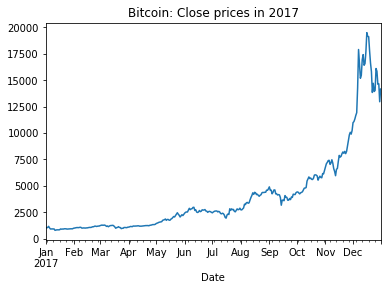

In [19]:
# Plot usando .plot() do Pandas
btc_2017["Close"].plot(title="Bitcoin: Close prices in 2017");

In [20]:
# Converte para Numpy
x = btc_2017.index.values
y = btc_2017["Close"].values

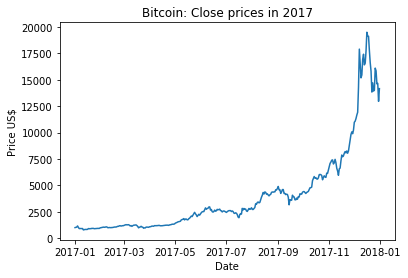

In [21]:
# Plot usando matplotlib.pyplot.plot()
plt.plot(x, y);
plt.xlabel("Date")
plt.ylabel("Price US$")
plt.title("Bitcoin: Close prices in 2017");

# 3. Análise de dados

Agora, veremos um exemplo de análise de dados usando um conjunto de dados do livro do James _(An Introduction to Statistical Learning)_.

Carregue os dados usando o comando abaixo. Lembre que a variável-alvo (rótulo, variável de saída) é a coluna `sales`.

In [22]:
df = pd.read_csv('http://faculty.marshall.usc.edu/gareth-james/ISL/Advertising.csv', index_col=0)
df.head() 

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


1. Trace o histograma de cada variável (coluna), i.e., 4 no total. Para isso, utilize a função `plt.hist()`, com parâmetro `bins=30`.
2. Calcule a matriz de correlação entre as colunas. Dica: utilize a função `pd.DataFrame.corr()`
3. Para cada atributo (variável de entrada), trace o gráfico do valor-alvo em função do atributo. Utilize um *scatter plot*, i.e., trace apenas os marcadores, não linhas.
4. O que você já pode afirmar sobre os dados a partir dessa análise exploratória?

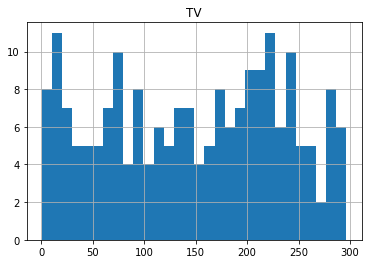

In [23]:
# Histograma da coluna 1, "TV"
df.hist("TV", bins=30);

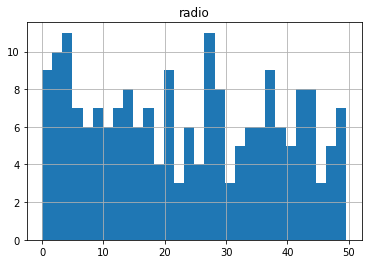

In [24]:
# Histograma da coluna 2, "radio"
df.hist("radio", bins=30);

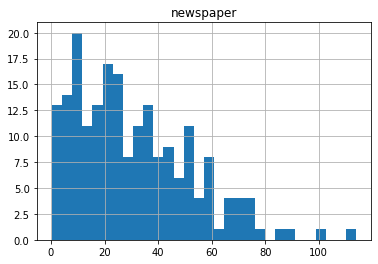

In [25]:
# Histograma da coluna 3, "newspaper"
df.hist("newspaper", bins=30);

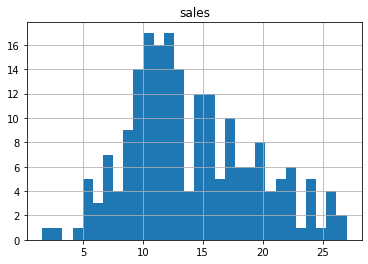

In [26]:
# Histograma da coluna 4, "sales"
df.hist("sales", bins=30);

In [27]:
# Matriz de correlação entre as colunas
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


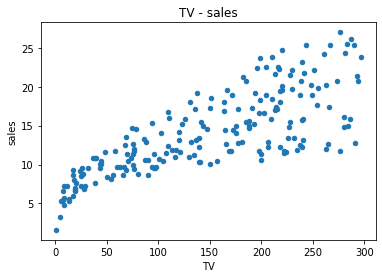

In [28]:
df.plot.scatter(x="TV", y="sales", title="TV - sales");

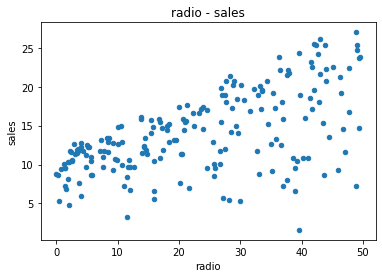

In [29]:
df.plot.scatter(x="radio", y="sales", title="radio - sales");

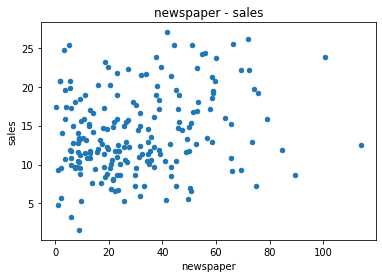

In [30]:
df.plot.scatter(x="newspaper", y="sales", title="newspaper - sales");

**4. Resposta**:
Pelos gráficos de vendas por publicidade em meio de comunicação, parece que o aumento que o aumento de propaganda em rádio e TV aumenta as vendas, enquando que nos jornais o aumento de publicidade não gera parece gerar um aumento nas vendas. Pela tabela de correlação, há uma engajamento maior entre publicidade na TV e vendas e baixo engajamento entre publicidade nos jornais e vendas e o rádio fica numa faixa intermediária.

5. Extraia a matriz de projeto $\bX$ e vetor de rótulos $\by$. Dica: utilize a função do pandas `.to_numpy()`
1. Separe o conjunto de dados aleatoriamente em conjuntos de treinamento e teste, nas proporções 80% e 20%, respectivamente. Para isso, utilize a função `train_test_split()` da biblioteca scikit-learn.

In [31]:
# Matriz de projeto X - Todas as colunas do DataFrame exceto o índice.
X = df[["TV", "radio", "newspaper"]].to_numpy()
# Vetor de rótulos y - Coluna "sales"
y = df["sales"].to_numpy() 
print(X.shape)
print(y.shape)

(200, 3)
(200,)


In [32]:
from sklearn.model_selection import train_test_split

In [33]:
# Separação em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(160, 3) (160,)
(40, 3) (40,)


7. Treine um modelo de regressão linear sobre o **conjunto de treinamento**. Para isso, utilize a função `sklearn.linear_model.LinearRegression()` da biblioteca sklearn. 
7. Calcule a raiz do erro quadrático médio (RMSE) da predição sobre o conjunto de treinamento e sobre o conjunto de teste. Para isso, utilize a função `sklearn.metrics.mean_squared_error()` do sklearn.
8. (OPCIONAL) Encontre alguma forma de visualizar o modelo treinado ou suas predições.

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [35]:
# Treinamento do modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
# Cálculo da raiz do erro quadrático médio (RMSE)
# RMSE sobre o conjunto de treinamento
y_train_predict = model.predict(X_train)
rmse_train = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
print('Train MSE:', rmse_train)
# RMSE sobre o conjunto de teste
y_test_predict = model.predict(X_test)
rmse_test = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
print('Test MSE:', rmse_test)

Train MSE: 1.5513912323520802
Test MSE: 2.098122563495681


In [37]:
# TV
TV_train = X_train[:,0].reshape(-1, 1)
TV_test = X_test[:,0].reshape(-1, 1)
# Treinamento do modelo de regressão linear
model_TV = LinearRegression()
model_TV.fit(TV_train, y_train)
# RMSE sobre o conjunto de treinamento
TV_train_predict = model_TV.predict(TV_train)
rmse_TV_train = (np.sqrt(mean_squared_error(TV_train, TV_train_predict)))
print('Train MSE:', rmse_TV_train)
# RMSE sobre o conjunto de teste
TV_test_predict =  model_TV.predict(TV_test)
rmse_TV_test = (np.sqrt(mean_squared_error(TV_test, TV_test_predict)))
print('Test MSE:', rmse_TV_test)

Train MSE: 158.44775739682737
Test MSE: 146.2053359239662


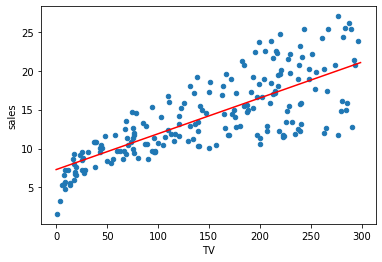

In [38]:
# Plot TV
df.plot(x='TV', y='sales', kind='scatter')
TV = np.linspace(0, 299, 100).reshape(-1, 1)
plt.plot(TV, model_TV.predict(TV), 'r');

In [39]:
# radio
radio_train = X_train[:,1].reshape(-1, 1)
radio_test = X_test[:,1].reshape(-1, 1)
# Treinamento do modelo de regressão linear
model_radio = LinearRegression()
model_radio.fit(radio_train, y_train)
# RMSE sobre o conjunto de treinamento
radio_train_predict = model_radio.predict(radio_train)
rmse_radio_train = (np.sqrt(mean_squared_error(radio_train, radio_train_predict)))
print('Train MSE:', rmse_radio_train)
# RMSE sobre o conjunto de teste
radio_test_predict =  model_radio.predict(radio_test)
rmse_radio_test = (np.sqrt(mean_squared_error(radio_test, radio_test_predict)))
print('Test MSE:', rmse_radio_test)

Train MSE: 14.831481570728563
Test MSE: 14.902667093128311


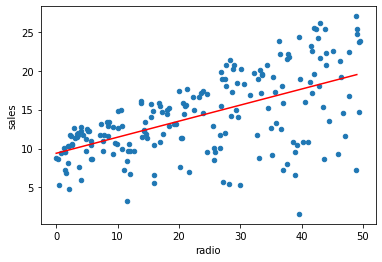

In [40]:
# Plot radio
df.plot(x='radio', y='sales', kind='scatter')
radio = np.linspace(0, 49, 20).reshape(-1, 1)
plt.plot(radio, model_radio.predict(radio), 'r');

In [41]:
# newspaper
newspaper_train = X_train[:,2].reshape(-1, 1)
newspaper_test = X_test[:,2].reshape(-1, 1)
# Treinamento do modelo de regressão linear
model_newspaper = LinearRegression()
model_newspaper.fit(newspaper_train, y_train)
# RMSE sobre o conjunto de treinamento
newspaper_train_predict = model_newspaper.predict(newspaper_train)
rmse_newspaper_train = (np.sqrt(mean_squared_error(newspaper_train, newspaper_train_predict)))
print('Train MSE:', rmse_newspaper_train)
# RMSE sobre o conjunto de teste
newspaper_test_predict =  model_newspaper.predict(newspaper_test)
rmse_newspaper_test = (np.sqrt(mean_squared_error(newspaper_test, newspaper_test_predict)))
print('Test MSE:', rmse_newspaper_test)

Train MSE: 25.62455446052177
Test MSE: 28.060425491947914


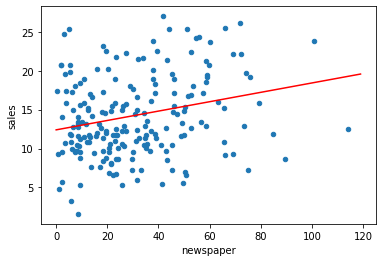

In [42]:
# Plot radio
df.plot(x='newspaper', y='sales', kind='scatter')
newspaper = np.linspace(0, 119, 50).reshape(-1, 1)
plt.plot(newspaper, model_newspaper.predict(newspaper), 'r');

<!-- 
np.transpose(A) @ B
np.transpose(B) @ A
-->

<!--

Este funcionou, mas o eixo x ficou como inteiro e não como data.

# import datetime as dt

# define índices iniciais e finais
row_1 = btc_tbl[btc_tbl['Date'].isin(['Jan 01, 2017'])]
index1 = row_1.index
i1 = index1.to_numpy()
last = i1[0] + 1
row_2 = btc_tbl[btc_tbl['Date'].isin(['Dec 31, 2017'])]
index2 = row_2.index
i2 = index2.to_numpy()
first = i2[0]
btc_plt = btc_tbl[first:last]

# reverte 
rev_btc = btc_plt.iloc[::-1].reset_index(drop=True)
rev_btc.head(5)

# plot
rev_btc["Close"].plot(title="Bitcoin: Close prices in 2017");

# reverte 
# rev_btc_2017 = btc_2017.iloc[::-1].reset_index(drop=True)
# rev_btc_2017.head(5)

# Seleciona apenas os dados de 2017
# From = '2017-01-01'
# To   = '2017-12-31'
# btc_2017 = btc_tbl.loc[From:To,:]
# btc_2017
-->

<!--
Testes que não funcionaram

# bitcoin_price = pd.read_csv(ex1_path + '/data/bitcoin_price.csv')  #, index_col=0, parse_dates=True)

# bitcoin_price.head(5)
# bitcoin_price["Close"].plot()

# bitcoin_price_test = bitcoin_price.rename(columns={"Date": "datetime"})
# bitcoin_price_test

# bitcoin_price_test["datetime"] = pd.to_datetime(bitcoin_price_test["datetime"])

# tmin = bitcoin_price_test["datetime"].min()
# tmin

# bitcoin_price_test["year"] = bitcoin_price_test["datetime"].dt.year

# bitcoin_price_test.head()

# test = bitcoin_price_test.groupby(bitcoin_price_test["datetime"].dt.year)["Close"].max()

# test
# btc_2017 = bitcoin_price_test.pivot(index="datetime", columns="datetime", values="Close")

# bitcoin_price_2017 = bitcoin_price.iloc[51: 416,:]
# bitcoin_price_2017["Close"].plot()

# New

# bitcoin_price = pd.read_csv(ex1_path + '/data/bitcoin_price.csv', index_col=0, parse_dates=True)
# bitcoin_price

# start = bitcoin_price.index.searchsorted(dt.datetime(2017, 1, 1))
# end = bitcoin_price.index.searchsorted(dt.datetime(2017, 12, 31))
# start = bitcoin_price.index.searchsorted("2017-01-01")
# end = bitcoin_price.index.searchsorted("2017-12-31")
# print(f"start = {start}: end = {end}")

# btc_2017 = bitcoin_price['20170101':'20171231']
# btc_2017.head(1)

# bitcoin_price.sort_index('Date')

-->